In [1]:
import geopandas as gpd
import pandas as pd

# Load GeoJSON file
gdf = gpd.read_file('/content/drive/MyDrive/zones_arretes_en_vigueur.geojson')

# Extract specific properties
properties_to_extract = ['id_arrete', 'id_zone', 'nom_zone', 'code_zone', 'code_departement', 'nom_departement', 'numero_arrete', 'numero_arrete_cadre', 'date_signature', 'debut_validite_arrete', 'fin_validite_arrete', 'nom_niveau', 'statut_arrete', 'geometry']
extracted_data = gdf[properties_to_extract]

# Save to CSV file
extracted_data.to_csv('/content/drive/MyDrive/zones_data.csv', index=False)

In [2]:
from collections import Counter

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/zones_data.csv')

# Extract unique values of nom_niveau and count occurrences
nom_niveau_counter = Counter(df['nom_niveau'])

# Print the unique values and their counts
for level, count in nom_niveau_counter.items():
    print(f"{level}: {count}")

Alerte: 13
Vigilance: 12
Alerte renforcée: 16
Crise: 16


In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/zones_data.csv')

# Convert 'debut_validite_arrete' and 'fin_validite_arrete' columns to datetime objects with format specification
df['debut_validite_arrete'] = pd.to_datetime(df['debut_validite_arrete'], format='%Y-%m-%d', errors='coerce')
df['fin_validite_arrete'] = pd.to_datetime(df['fin_validite_arrete'], format='%Y-%m-%d', errors='coerce')

# Drop rows with NaT values
df = df.dropna(subset=['debut_validite_arrete', 'fin_validite_arrete'])

# Calculate the number of days between 'debut_validite_arrete' and 'fin_validite_arrete'
df['days_validity'] = (df['fin_validite_arrete'] - df['debut_validite_arrete']).dt.days


In [4]:
# Display the calculated weights
display(df)

,id_arrete,id_zone,nom_zone,code_zone,code_departement,nom_departement,numero_arrete,numero_arrete_cadre,date_signature,debut_validite_arrete,fin_validite_arrete,nom_niveau,statut_arrete,geometry,days_validity
1,34264,10945,bassin de la Truyère,76_48_0001,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.3547 44.95521, 3.35528 44.95...",408
2,34264,10946,bassin de la Colagne,76_48_0002,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.1419 44.58989, 3.14227 44.59...",408
3,34264,10947,cours d'eau Colagne,76_48_0003,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.25686 44.51394, 3.25649 44.5...",408
4,34264,10948,bassin du Lot,76_48_0004,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.20107 44.31797, 3.20067 44.3...",408
5,34264,10949,bassin du Bramont,76_48_0005,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.62607 44.40855, 3.62382 44.4...",408
6,34265,10957,bassin du Chassezac,76_48_0013,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACD RM),ACD RM DDT-BIEF 2023-199-0003_18/07/2023,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.91475 44.59054, 3.9148 44.59...",408
7,34265,10958,bassin de la Cèze,76_48_0014,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACD RM),ACD RM DDT-BIEF 2023-199-0003_18/07/2023,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.97306 44.42674, 3.97308 44.4...",408
8,34265,10959,bassin des Gardons,76_48_0015,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACD RM),ACD RM DDT-BIEF 2023-199-0003_18/07/2023,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.92331 44.30457, 3.92341 44.3...",408
9,34265,10960,bassin de l'Hérault,76_48_0016,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACD RM),ACD RM DDT-BIEF 2023-199-0003_18/07/2023,2023-10-05,2023-10-07,2024-11-18,Vigilance,Terminé,"MULTIPOLYGON (((3.63286 44.12128, 3.63283 44.1...",408
12,34647,9371,Dombes – Certines – Nord,84_01_4,1,Ain,2023-11-01,Ain - AC 20230612 - V2,2023-12-06,2023-12-06,2024-03-31,Alerte renforcée,Publié,"MULTIPOLYGON (((4.97452 45.96621, 4.97433 45.9...",116


In [5]:
df.to_csv('/content/drive/MyDrive/France_regional.csv', index=False)

In [6]:
# Group the DataFrame by 'id_zone' and sum the number of days under each type of alert
def calculate_risk_weight(group):
    total_days = group['days_validity'].sum()
    alert_days = group[group['nom_niveau'] == 'Alerte']['days_validity'].sum()
    vigilance_days = group[group['nom_niveau'] == 'Vigilance']['days_validity'].sum()
    reinforced_alert_days = group[group['nom_niveau'] == 'Alerte renforcée']['days_validity'].sum()
    crisis_days = group[group['nom_niveau'] == 'Crise']['days_validity'].sum()

    # Calculate the weight of the risk
    risk_weight = (0 * alert_days + 0.25 * vigilance_days + 0.5 * reinforced_alert_days + 1 * crisis_days) / total_days
    return pd.Series([risk_weight], index=['risk_weight'])

risk_weights = df.groupby('id_zone').apply(calculate_risk_weight).reset_index()

# Display the calculated risk weights
display(risk_weights)


,id_zone,risk_weight
0,9371,0.50
1,9372,0.50
2,10945,0.00
3,10946,0.00
4,10947,0.00
5,10948,0.00
6,10949,0.00
7,10957,0.00
8,10958,0.00
9,10959,0.00


In [7]:
df = pd.merge(df, risk_weights, on='id_zone', how='left')
display(df)

,id_arrete,id_zone,nom_zone,code_zone,code_departement,nom_departement,numero_arrete,numero_arrete_cadre,date_signature,debut_validite_arrete,fin_validite_arrete,nom_niveau,statut_arrete,geometry,days_validity,risk_weight
0,34264,10945,bassin de la Truyère,76_48_0001,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.3547 44.95521, 3.35528 44.95...",408,0.00
1,34264,10946,bassin de la Colagne,76_48_0002,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.1419 44.58989, 3.14227 44.59...",408,0.00
2,34264,10947,cours d'eau Colagne,76_48_0003,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.25686 44.51394, 3.25649 44.5...",408,0.00
3,34264,10948,bassin du Lot,76_48_0004,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.20107 44.31797, 3.20067 44.3...",408,0.00
4,34264,10949,bassin du Bramont,76_48_0005,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACI Lot),ACI BASSIN DU LOT 2023-176,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.62607 44.40855, 3.62382 44.4...",408,0.00
5,34265,10957,bassin du Chassezac,76_48_0013,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACD RM),ACD RM DDT-BIEF 2023-199-0003_18/07/2023,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.91475 44.59054, 3.9148 44.59...",408,0.00
6,34265,10958,bassin de la Cèze,76_48_0014,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACD RM),ACD RM DDT-BIEF 2023-199-0003_18/07/2023,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.97306 44.42674, 3.97308 44.4...",408,0.00
7,34265,10959,bassin des Gardons,76_48_0015,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACD RM),ACD RM DDT-BIEF 2023-199-0003_18/07/2023,2023-10-05,2023-10-07,2024-11-18,Alerte,Terminé,"MULTIPOLYGON (((3.92331 44.30457, 3.92341 44.3...",408,0.00
8,34265,10960,bassin de l'Hérault,76_48_0016,48,Lozère,DDT-BIEF-2023-278-0002 du 5 octobre (ACD RM),ACD RM DDT-BIEF 2023-199-0003_18/07/2023,2023-10-05,2023-10-07,2024-11-18,Vigilance,Terminé,"MULTIPOLYGON (((3.63286 44.12128, 3.63283 44.1...",408,0.25
9,34647,9371,Dombes – Certines – Nord,84_01_4,1,Ain,2023-11-01,Ain - AC 20230612 - V2,2023-12-06,2023-12-06,2024-03-31,Alerte renforcée,Publié,"MULTIPOLYGON (((4.97452 45.96621, 4.97433 45.9...",116,0.50


In [8]:
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [9]:
import geopandas as gpd

# Load the shapefile
shapefile_path = '/content/drive/MyDrive/all_zones.shp'
gdf_shapefile = gpd.read_file(shapefile_path)

# Set the CRS of the shapefile
# Replace 'EPSG:4326' with the appropriate CRS code if it's different
gdf_shapefile.crs = 'EPSG:4326'

# Now the CRS of the shapefile should be set
print("Shapefile CRS:", gdf_shapefile.crs)


Shapefile CRS: EPSG:4326


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


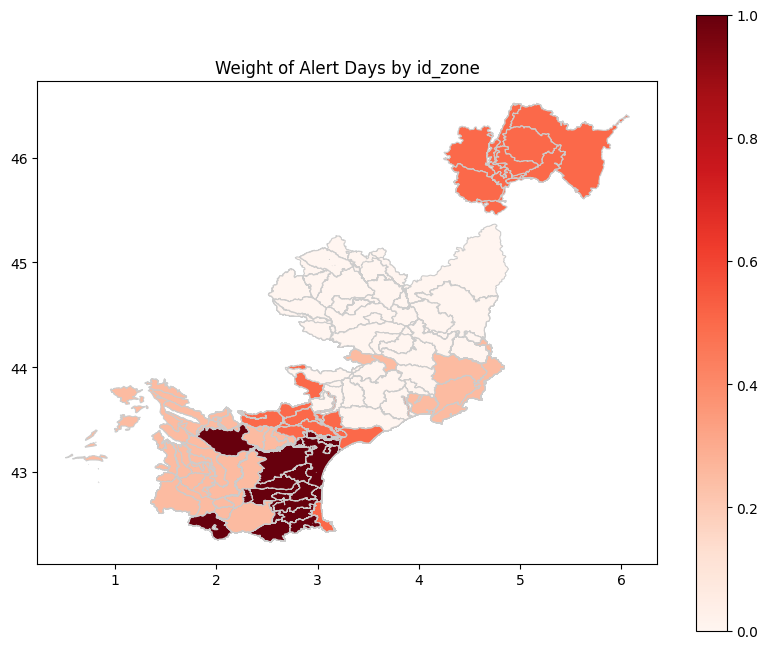

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os


# Load the shapefile of France's administrative boundaries
france_map = gpd.read_file('/content/drive/MyDrive/all_zones.shp')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']), crs='EPSG:4326')

# Set CRS for france_map if not already set
if france_map.crs is None:
    france_map.set_crs('EPSG:4326', inplace=True)

# Before merging, ensure both GeoDataFrames are in the same CRS
france_map = france_map.to_crs(gdf.crs)

# Spatial join between France map and the GeoDataFrame containing the weights by 'id_zone'
merged_map = gpd.sjoin(france_map, gdf, how="left", op='intersects')

# Plotting the map with consideration for multipolygons
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_map.plot(column='risk_weight', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Weight of Alert Days by id_zone')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


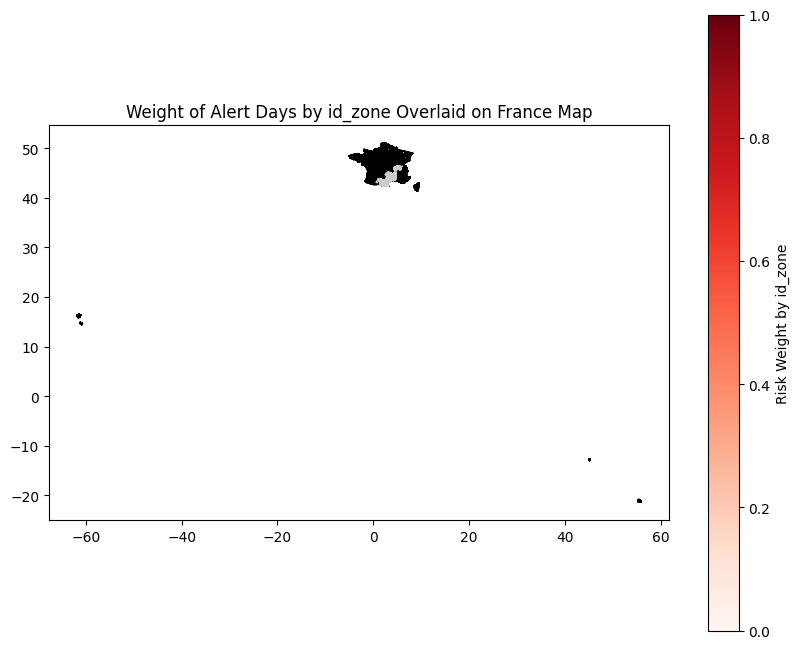

In [11]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os


# Load the shapefile of France's administrative boundaries
france_map = gpd.read_file('/content/drive/MyDrive/all_zones.shp')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']), crs='EPSG:4326')

# Set CRS for france_map if not already set
if france_map.crs is None:
    france_map.set_crs('EPSG:4326', inplace=True)

# Before merging, ensure both GeoDataFrames are in the same CRS
france_map = france_map.to_crs(gdf.crs)

# Spatial join between France map and the GeoDataFrame containing the weights by 'id_zone'
merged_map = gpd.sjoin(france_map, gdf, how="left", op='intersects')

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the base layer of France's shape
france_map.plot(ax=ax, color='white', edgecolor='black')

# Overlay the merged_map with analysis results
# Adjust the 'column' parameter if your analysis results are stored in a different column
merged_map.plot(column='risk_weight', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Risk Weight by id_zone"})

ax.set_title('Weight of Alert Days by id_zone Overlaid on France Map')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


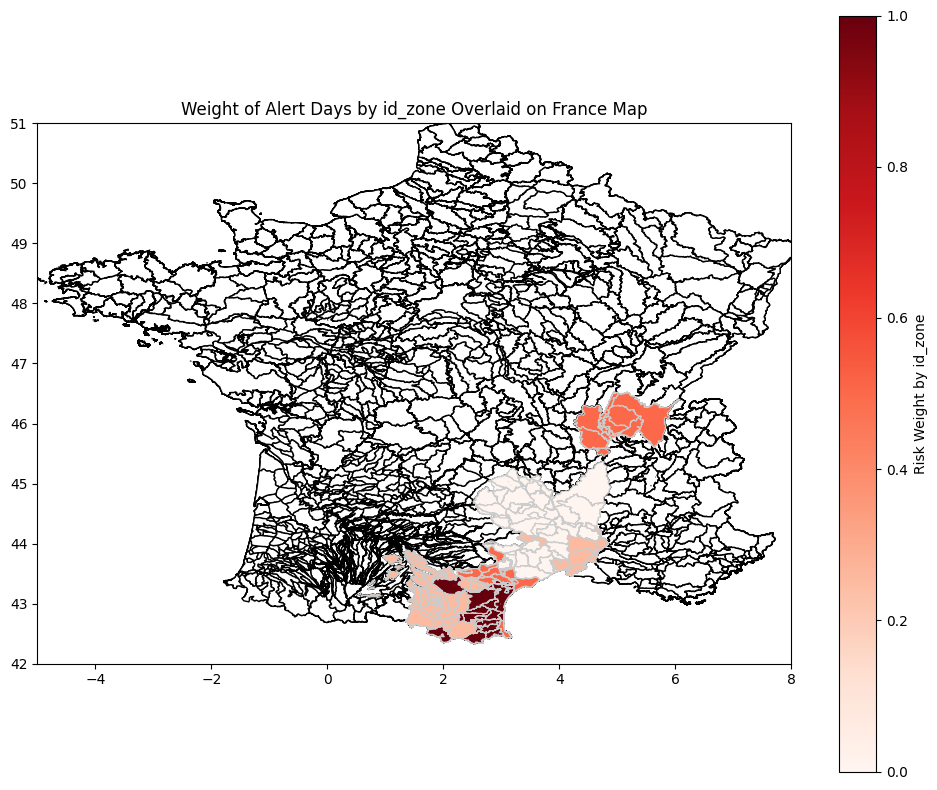

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the shapefile of France's administrative boundaries
france_map = gpd.read_file('/content/drive/MyDrive/all_zones.shp')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']), crs='EPSG:4326')

# Set CRS for france_map if not already set
if france_map.crs is None:
    france_map.set_crs('EPSG:4326', inplace=True)

# Before merging, ensure both GeoDataFrames are in the same CRS
france_map = france_map.to_crs(gdf.crs)

# Spatial join between France map and the GeoDataFrame containing the weights by 'id_zone'
merged_map = gpd.sjoin(france_map, gdf, how="left", op='intersects')

# Approximate bounding box coordinates for Metropolitan France
minx, miny, maxx, maxy = -5.0, 42.0, 8.0, 51.0  # Adjust these bounds as necessary

# Increase the figure size for a larger display and set the plot limits to focus on Metropolitan France
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the base layer of France's shape
france_map.plot(ax=ax, color='white', edgecolor='black')

# Overlay the merged_map with analysis results
merged_map.plot(column='risk_weight', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Risk Weight by id_zone"})

# Set the plot limits to focus on Metropolitan France
ax.set_xlim([minx, maxx])
ax.set_ylim([miny, maxy])

ax.set_title('Weight of Alert Days by id_zone Overlaid on France Map')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


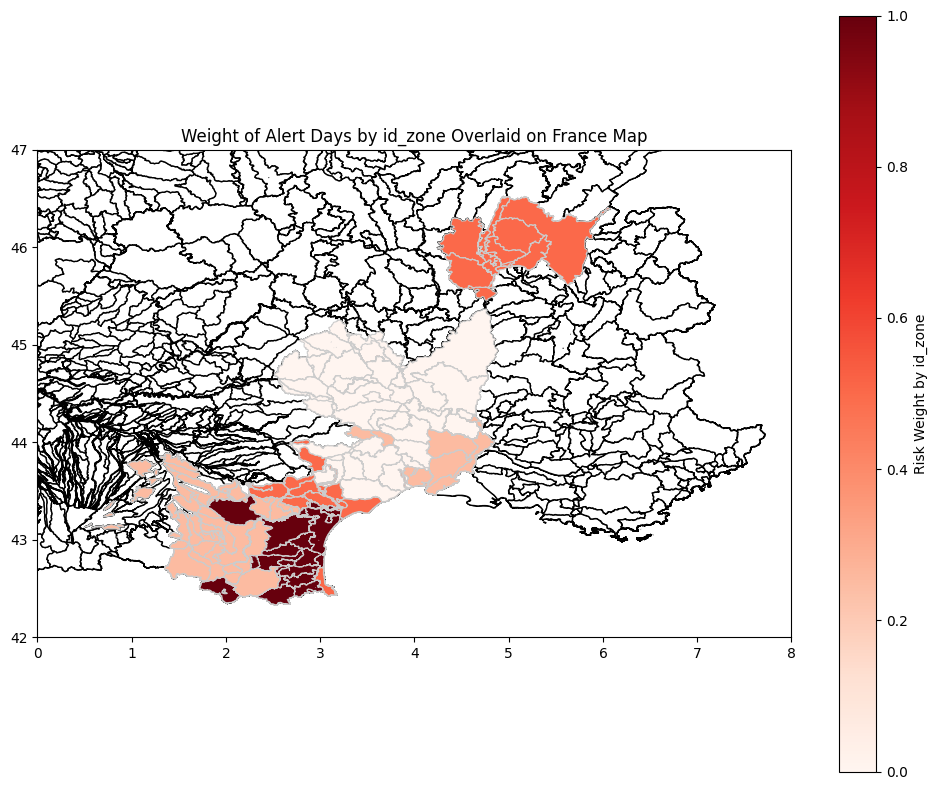

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the shapefile of France's administrative boundaries
france_map = gpd.read_file('/content/drive/MyDrive/all_zones.shp')

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']), crs='EPSG:4326')

# Set CRS for france_map if not already set
if france_map.crs is None:
    france_map.set_crs('EPSG:4326', inplace=True)

# Before merging, ensure both GeoDataFrames are in the same CRS
france_map = france_map.to_crs(gdf.crs)

# Spatial join between France map and the GeoDataFrame containing the weights by 'id_zone'
merged_map = gpd.sjoin(france_map, gdf, how="left", op='intersects')

# Approximate bounding box coordinates for Metropolitan France
minx, miny, maxx, maxy = 0.0, 42.0, 8.0, 47.0  # Adjust these bounds as necessary

# Increase the figure size for a larger display and set the plot limits to focus on Metropolitan France
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the base layer of France's shape
france_map.plot(ax=ax, color='white', edgecolor='black')

# Overlay the merged_map with analysis results
merged_map.plot(column='risk_weight', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Risk Weight by id_zone"})

# Set the plot limits to focus on Metropolitan France
ax.set_xlim([minx, maxx])
ax.set_ylim([miny, maxy])

ax.set_title('Weight of Alert Days by id_zone Overlaid on France Map')
plt.tight_layout()
plt.show()
